Lee Eisenberg & ShaoYang Li

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

I couldn't find any outliers from looking through the data, but I'll see if any become apparent after futher data manipulation.

C:\Users\antee\AppData\Local\Temp\ipykernel_34592\1284366677.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfEconomic['Fare'].replace(0, 1, inplace=True) #avoid divide by 0 in logarithm


Text(0.5, 1.0, 'Economic Correlation Heatmap')

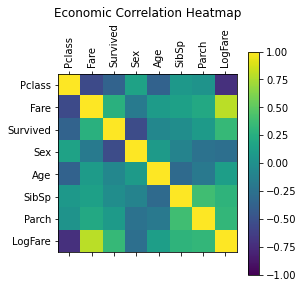

In [64]:
dfEconomic = dfTrain[['Pclass', 'Fare', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch']]
dfEconomic = dfEconomic.dropna() #just for now
dfEconomic['Fare'].replace(0, 1, inplace=True) #avoid divide by 0 in logarithm
dfEconomic['LogFare'] = np.log(dfEconomic['Fare'])

def genderInt(x):
    if x == 'male':
        return 1
    else:
        return 0

dfEconomic['Sex'] = dfEconomic['Sex'].apply(genderInt)
dfEconomic['Sex'] = pd.to_numeric(dfEconomic['Sex'])
dfEconomicPairwise = dfEconomic.corr(numeric_only=False) #pairwise correlation matrix
plt.matshow(dfEconomicPairwise, vmin = -1) #plot heatmap
plt.xticks(range(len(dfEconomicPairwise.columns)), dfEconomicPairwise.columns, rotation = 90)
plt.yticks(range(len(dfEconomicPairwise.columns)), dfEconomicPairwise.columns)
plt.colorbar()
plt.title('Economic Correlation Heatmap')

There is a strong correlation between a passenger's class and their fare, and an even stronger correlation with the logarithm of their fare. There is also a strong correlation between a passenger's gender and survival, with women being much more likely to survive.

In [61]:
dfTrainNumeric = dfTrain[['Pclass', 'Fare', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch']]
dfTrainNumeric['Sex'] = dfTrainNumeric['Sex'].replace(['male', 'female'], [1, 0]) #convert gender to numeric
dfTrainNumeric.apply({'Sex': pd.to_numeric}, inplace=True)

dfAllMean = dfTrainNumeric.mean()
dfAllStdev = dfTrainNumeric.std()
dfAllMedian = dfTrainNumeric.median()
dfAllStats = pd.concat([dfAllMean, dfAllStdev, dfAllMedian], axis=1)
dfAllStats.columns = ['Mean', 'Stdev', 'Median']
dfAllStats = dfAllStats.drop('Survived')
print('All Stats')
print(dfAllStats)

dfSurvivors = dfTrainNumeric[dfTrainNumeric['Survived'] == 1]
dfDead = dfTrainNumeric[dfTrainNumeric['Survived'] == 0]
dfSurvivorsMean = dfSurvivors.mean()
dfDeadMean = dfDead.mean()
dfSurvivorsStdev = dfSurvivors.std()
dfDeadStdev = dfDead.std()
dfSurvivorsMedian = dfSurvivors.median()
dfDeadMedian = dfDead.median()
dfSurvivorsStats = pd.concat([dfSurvivorsMean, dfSurvivorsStdev, dfSurvivorsMedian], axis=1)
dfSurvivorsStats.columns = ['Mean', 'Stdev', 'Median']
dfDeadStats = pd.concat([dfDeadMean, dfDeadStdev, dfDeadMedian], axis=1)
dfDeadStats.columns = ['Mean', 'Stdev', 'Median']
dfSurvivorsStats = dfSurvivorsStats.drop('Survived')
dfDeadStats = dfDeadStats.drop('Survived')
print('Survivors Stats') #sex value represents percentage that are male
print(dfSurvivorsStats)
print('Dead Stats')
print(dfDeadStats)


All Stats
             Mean      Stdev   Median
Pclass   2.308642   0.836071   3.0000
Fare    32.204208  49.693429  14.4542
Sex      0.647587   0.477990   1.0000
Age     29.699118  14.526497  28.0000
SibSp    0.523008   1.102743   0.0000
Parch    0.381594   0.806057   0.0000
Survivors Stats
             Mean      Stdev  Median
Pclass   1.950292   0.863321     2.0
Fare    48.395408  66.596998    26.0
Sex      0.318713   0.466660     0.0
Age     28.343690  14.950952    28.0
SibSp    0.473684   0.708688     0.0
Parch    0.464912   0.771712     0.0
Dead Stats
             Mean      Stdev  Median
Pclass   2.531876   0.735805     3.0
Fare    22.117887  31.388207    10.5
Sex      0.852459   0.354968     1.0
Age     30.626179  14.172110    28.0
SibSp    0.553734   1.288399     0.0
Parch    0.329690   0.823166     0.0


C:\Users\antee\AppData\Local\Temp\ipykernel_34592\3586192675.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfTrainNumeric['Sex'] = dfTrainNumeric['Sex'].replace(['male', 'female'], [1, 0]) #convert gender to numeric
C:\Users\antee\AppData\Local\Temp\ipykernel_34592\3586192675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrainNumeric['Sex'] = dfTrainNumeric['Sex'].replace(['male', 'female'], [1, 0]) #convert gender to numeric


These statistics tell us that the average survivor was of a higher class, paid a higher fare, and had more parents / children aboard then the average non-survivor. The average survivor was also much more likely to be a female then a male. However, the average age and number of siblings / spouses aboard was about the same for both survivors and non-survivors.

In [60]:
dfMale = dfTrainNumeric[dfTrainNumeric['Sex'] == 1]
dfFemale = dfTrainNumeric[dfTrainNumeric['Sex'] == 0]
dfMaleMean = dfMale.mean()
dfFemaleMean = dfFemale.mean()
dfMaleStdev = dfMale.std()
dfFemaleStdev = dfFemale.std()
dfMaleMedian = dfMale.median()
dfFemaleMedian = dfFemale.median()
dfMaleStats = pd.concat([dfMaleMean, dfMaleStdev, dfMaleMedian], axis=1)
dfMaleStats.columns = ['Mean', 'Stdev', 'Median']
dfFemaleStats = pd.concat([dfFemaleMean, dfFemaleStdev, dfFemaleMedian], axis=1)
dfFemaleStats.columns = ['Mean', 'Stdev', 'Median']
dfMaleStats = dfMaleStats.drop('Sex')
dfFemaleStats = dfFemaleStats.drop('Sex')
print('Male Stats') #survival value represents percentage that survived
print(dfMaleStats)
print('Female Stats')
print(dfFemaleStats)

Male Stats
               Mean      Stdev  Median
Pclass     2.389948   0.813580     3.0
Fare      25.523893  43.138263    10.5
Survived   0.188908   0.391775     0.0
Age       30.726645  14.678201    29.0
SibSp      0.429809   1.061811     0.0
Parch      0.235702   0.612294     0.0
Female Stats
               Mean      Stdev  Median
Pclass     2.159236   0.857290     2.0
Fare      44.479818  57.997698    23.0
Survived   0.742038   0.438211     1.0
Age       27.915709  14.110146    27.0
SibSp      0.694268   1.156520     0.0
Parch      0.649682   1.022846     0.0
